# Pymaceuticals Inc.
---

### Analysis
#Observation 1. For both Ramicane and Capomulin, mice with higher weights have higher average tumor volumes:

    #For mice treated with Ramicane, the average tumor volume for mice weighing 16-20 grams is 31.46 mm3 and for mice weighing 21-25 grams is 39.62 mm3.
    #For mice treated with Capomulin, the average tumor volume for mice weighing 15-19 grams is 30.64 mm3 and for mice weighing 20-25 grams is 39.95 mm3.
    
#Observation 2.  For both Ceftamin and Infubinol, mice with higher weights also have higher average tumor volumes:

    #For mice treated with Ceftamin, the average tumor volume for mice weighing 25-28 grams is 57.03 mm3 and for mice weighing 29-30 grams is 64.30 mm3.
    #For mice treated with Infubinol, the average tumor volume for mice weighing 25-27 grams is 58.62 mm3 and for mice weighing 28-30 grams is 65.53 mm3.
#Observation 3.  For all four drug regimens, mice with higher ages have higher average tumor volumes:

    #For mice treated with Ramicane, the average tumor volume for mice aged 1-12 months is 34.56 mm3 and for mice aged 13-24 months is 38.08 mm3.
    #For mice treated with Capomulin, the average tumor volume for mice aged 1-12 months is 35.72 mm3 and for mice aged 13-24 months is 37.82 mm3.
    #For mice treated with Ceftamin, the average tumor volume for mice aged 1-12 months is 52.85 mm3 and for mice aged 13-24 months is 60.97 mm3.
    #For mice treated with Infubinol, the average tumor volume for mice aged 1-12 months is 58.55 mm3 and for mice aged 13-24 months is 65.53 mm3. 
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_mouse_df['Mouse ID'].nunique()

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_check = combined_mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'])
dupe_ID = combined_mouse_df.loc[dupe_check,'Mouse ID'].unique()
dupe_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_df = combined_mouse_df.loc[combined_mouse_df["Mouse ID"] == "g989"]
dupe_mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_mouse_df_alt = combined_mouse_df.rename(columns={"Mouse ID":"Mouse_ID"})

clean_mouse_df = combined_mouse_df_alt[combined_mouse_df_alt.Mouse_ID != "g989"]
clean_mouse_df

,Mouse_ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_df['Mouse_ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).mean()
median = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).median()
variance = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).var()
standard_deviation = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).std()
SEM = clean_mouse_df['Tumor Volume (mm3)'].groupby(clean_mouse_df['Drug Regimen']).sem()


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
summary_df = pd.DataFrame({"Mean Tumor Volume":mean, 
                            "Median Tumor Volume":median, 
                           "Tumor Volume Variance":variance, 
                           "Tumor Volume Std. Dev.":standard_deviation, 
                           "Tumor Volume Std. Err.":SEM})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
summary_df_2 =  clean_mouse_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_df_2

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

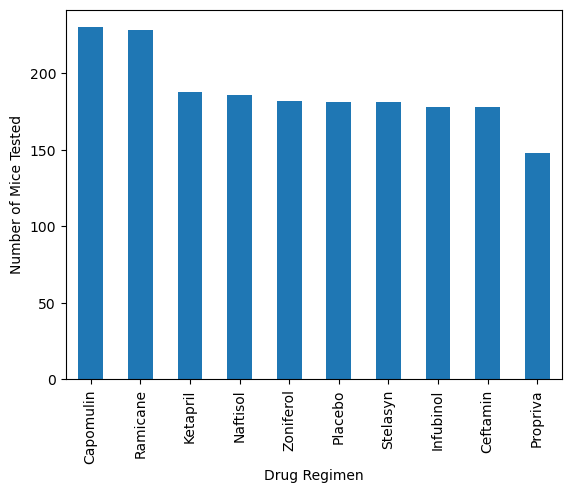

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
xy_values = clean_mouse_df["Drug Regimen"].value_counts()
xy_values.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

<function matplotlib.pyplot.show(close=None, block=None)>

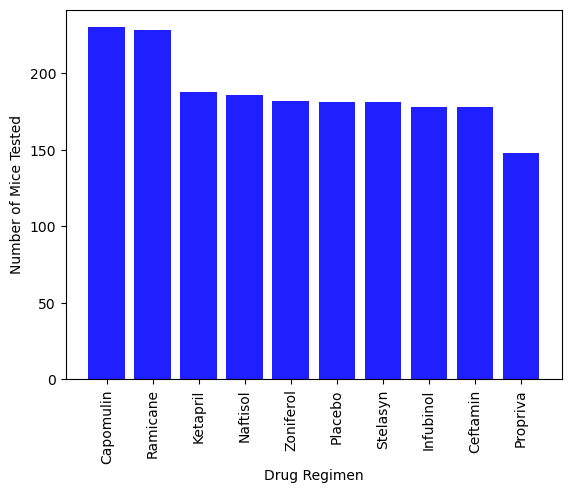

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

plt.xticks(rotation="vertical")
plt.bar(xy_values.index, xy_values.values, color='b', alpha=0.88)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.show

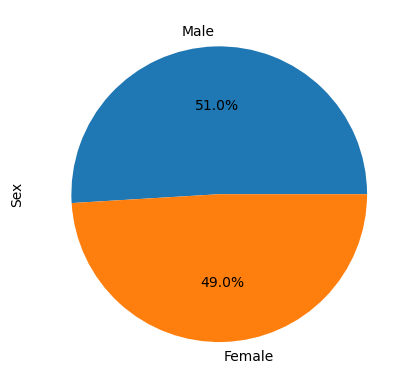

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_data = clean_mouse_df["Sex"].value_counts()
pie_data.plot(kind='pie', autopct='%1.1f%%')
plt.show()

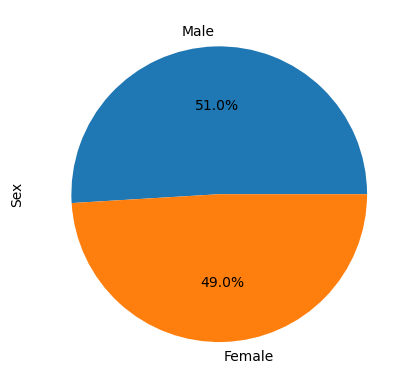

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pie = pie_data.plot.pie(autopct='%.1f%%')

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

#filter Ramicane data
Ramicane_data = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == "Ramicane",:] 
#make a dataframe with last timepoints
Ramicane_data_2 = Ramicane_data.groupby('Mouse_ID').max()['Timepoint']
#merge data to get tumor volumes
Ramicane_merged_df = pd.merge(Ramicane_data_2, clean_mouse_df, on=("Mouse_ID","Timepoint"),how="left")

#filter Capomulin data
Capomulin_data = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == "Capomulin",:] 
#make a dataframe with last timepoints
Capomulin_data_2 = Capomulin_data.groupby('Mouse_ID').max()['Timepoint']
#merge data to get tumor volumes
Capomulin_merged_df = pd.merge(Capomulin_data_2, clean_mouse_df, on=("Mouse_ID","Timepoint"),how="left")

#filter Infubinol data
Infubinol_data = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == "Infubinol",:] 
#make a dataframe with last timepoints
Infubinol_data_2 = Infubinol_data.groupby('Mouse_ID').max()['Timepoint']
#merge data to get tumor volumes
Infubinol_merged_df = pd.merge(Infubinol_data_2, clean_mouse_df, on=("Mouse_ID","Timepoint"),how="left")

#filter Ceftamin data
Ceftamin_data = clean_mouse_df.loc[clean_mouse_df['Drug Regimen'] == "Ceftamin",:] 
#make a dataframe with last timepoints
Ceftamin_data_2 = Ceftamin_data.groupby('Mouse_ID').max()['Timepoint']
#merge data to get tumor volumes
Ceftamin_merged_df = pd.merge(Ceftamin_data_2, clean_mouse_df, on=("Mouse_ID","Timepoint"),how="left")

#combine all 4 drugs data
merged_mouse_df = pd.concat([Ramicane_merged_df, Capomulin_merged_df, Ceftamin_merged_df, Infubinol_merged_df])
merged_mouse_df

,Mouse_ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
...,...,...,...,...,...,...,...,...
20,v766,15,Infubinol,Male,16,27,51.542431,1
21,w193,20,Infubinol,Male,22,30,50.005138,0
22,w584,30,Infubinol,Male,3,29,58.268442,1
23,y163,45,Infubinol,Female,17,27,67.685569,3


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

drug_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]



def find_outliers(drug):
    data = merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == drug]['Tumor Volume (mm3)']
    
    quartiles = data.quantile([0.25,0.75])
    lowerq = quartiles[0.25]
    higherq = quartiles[0.75]
    iqr = higherq-lowerq
    lower_limit = lowerq - (1.5 * iqr)
    upper_limit = higherq + (1.5 * iqr)

    outliers = data.loc[(data < lower_limit) | (data > upper_limit)]
    return(outliers)

for drug in drug_list:
    outliers = find_outliers(drug)
    print(f"{drug} potential outliers: {outliers}")


Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 5    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


<AxesSubplot:title={'center':'Tumor Volume (mm3)'}, xlabel='Drug Regimen'>

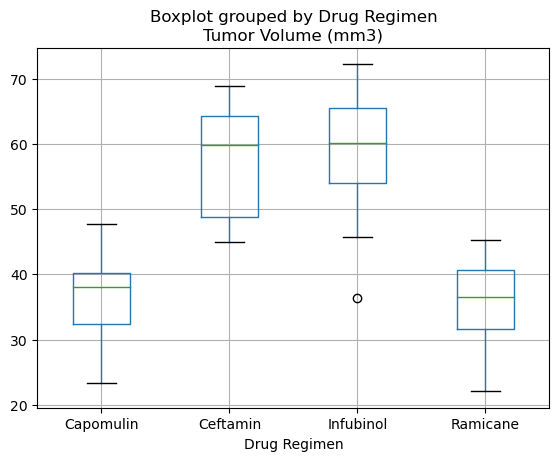

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
merged_mouse_df.boxplot(column=['Tumor Volume (mm3)'], by= 'Drug Regimen') 

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

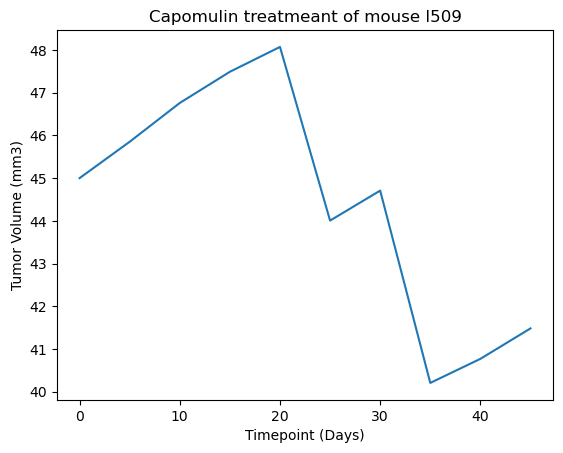

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

Capomulin_l509_mouse_df = Capomulin_data.loc[Capomulin_data["Mouse_ID"] == "l509",:]
x = Capomulin_l509_mouse_df["Timepoint"]
y = Capomulin_l509_mouse_df["Tumor Volume (mm3)"]
plt.plot(x,y)
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

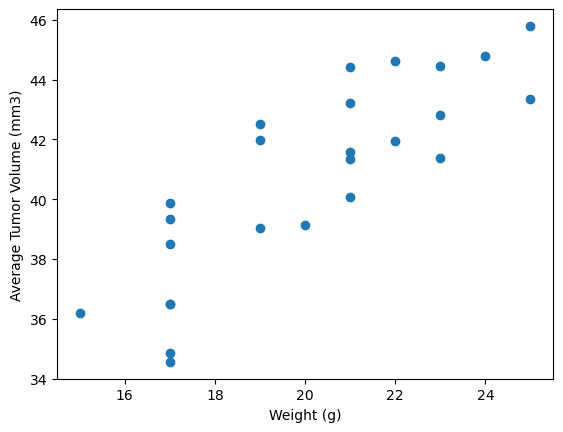

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
avg = Capomulin_data.groupby(['Mouse_ID']).mean()
plt.scatter(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

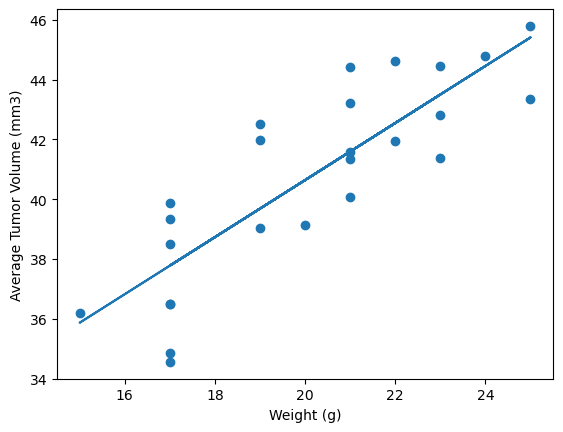

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = st.pearsonr(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}")
regression = st.linregress(avg['Weight (g)'],avg['Tumor Volume (mm3)'])
regression_values=avg["Weight (g)"]* regression.slope + regression.intercept
plt.scatter(avg["Weight (g)"],avg["Tumor Volume (mm3)"])
plt.plot(avg["Weight (g)"], regression_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")